In [2]:
import pandas as pd
import numpy as np

In [3]:
X_train = pd.read_csv("D:/Hackathons/GST_GOV/Train_60/X_Train_Data_Input_Imputed.csv")
y_train = pd.read_csv('D:/Hackathons/GST_GOV/Train_60/Y_Train_Data_Target.csv')
X_test = pd.read_csv('D:/Hackathons/GST_GOV/Test_20/X_Test_Data_Input_Imputed.csv')
y_test = pd.read_csv('D:/Hackathons/GST_GOV/Test_20/Y_Test_Data_Target.csv')

In [4]:
y_train = y_train.drop('ID', axis=1)
y_test = y_test.drop('ID', axis=1)

In [5]:
import pickle
with open("D:\Hackathons\GST_GOV\hypertuned_models\LightGBM.pkl", 'rb') as f:
    lightgbm_best_model = pickle.load(f)
with open('D:\Hackathons\GST_GOV\hypertuned_models\XGBoost.pkl', 'rb') as f:
    xgboost_best_model = pickle.load(f)
with open("D:\Hackathons\GST_GOV\hypertuned_models\CatBoost.pkl", 'rb') as f:    
    catboost_best_model = pickle.load(f)
# with open("D:\Hackathons\GST_GOV\hypertuned_models\BalancedBaggingClassifier.pkl", 'rb') as f:    
#     balanced_bagging_best_model = pickle.load(f)
# with open("D:\Hackathons\GST_GOV\hypertuned_models\BalancedRandomForest.pkl", 'rb') as f:    
#     balanced_rf_best_model = pickle.load(f)
# with open("D:\Hackathons\GST_GOV\hypertuned_models\HistGradientBoosting.pkl", 'rb') as f:    
#     histgb_best_model = pickle.load(f)
# with open("D:\Hackathons\GST_GOV\hypertuned_models\RUSBoost.pkl", 'rb') as f:    
#     rusboost_best_model = pickle.load(f)

<>:2: SyntaxWarning: invalid escape sequence '\H'
<>:4: SyntaxWarning: invalid escape sequence '\H'
<>:6: SyntaxWarning: invalid escape sequence '\H'
<>:2: SyntaxWarning: invalid escape sequence '\H'
<>:4: SyntaxWarning: invalid escape sequence '\H'
<>:6: SyntaxWarning: invalid escape sequence '\H'
C:\Users\umade\AppData\Local\Temp\ipykernel_17968\1501427202.py:2: SyntaxWarning: invalid escape sequence '\H'
  with open('D:\Hackathons\GST_GOV\hypertuned_models\XGBoost.pkl', 'rb') as f:
C:\Users\umade\AppData\Local\Temp\ipykernel_17968\1501427202.py:4: SyntaxWarning: invalid escape sequence '\H'
  with open("D:\Hackathons\GST_GOV\hypertuned_models\LightGBM.pkl", 'rb') as f:
C:\Users\umade\AppData\Local\Temp\ipykernel_17968\1501427202.py:6: SyntaxWarning: invalid escape sequence '\H'
  with open("D:\Hackathons\GST_GOV\hypertuned_models\CatBoost.pkl", 'rb') as f:
d:\Python\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from vers

In [6]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

# Create an ensemble of your top 3 models
ensemble = VotingClassifier(estimators=[
    ('xgb', xgboost_best_model),
    ('lgbm', lightgbm_best_model),
    ('catboost', catboost_best_model)
], voting='soft')  # soft voting for probability-based voting

# Fit the model
ensemble.fit(X_train, y_train)

# Make predictions
y_pred = ensemble.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 74033, number of negative: 711100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2270
[LightGBM] [Info] Number of data points in the train set: 785133, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094294 -> initscore=-2.262302
[LightGBM] [Info] Start training from score -2.262302
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

NameError: name 'roc_auc' is not defined

In [ ]:
xgboost_best_model.fit(X_train, y_train)

# Make predictions
y_pred = xgboost_best_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("==========TEST============")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')
print(f'AUC-ROC: {roc_auc}')
print(ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)))
plt.show()
print('==========Train==========')

# Evaluate model
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')
print(f'AUC-ROC: {roc_auc}')
print(ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred)))
plt.show()



In [ ]:
lightgbm_best_model.fit(X_train, y_train)

# Make predictions
y_pred = lightgbm_best_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("==========TEST============")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')
print(f'AUC-ROC: {roc_auc}')
print(ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)))
plt.show()
print('==========Train==========')

# Evaluate model
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')
print(f'AUC-ROC: {roc_auc}')
print(ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred)))
plt.show()



In [ ]:
# Fit the model
catboost_best_model.fit(X_train, y_train)

# Make predictions
y_pred = catboost_best_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("==========TEST============")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')
print(f'AUC-ROC: {roc_auc}')
print(ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)))
plt.show()
print('==========Train==========')

# Evaluate model
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

In [7]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Create an ensemble of your top 3 models
ensemble = VotingClassifier(estimators=[
    ('xgb', xgboost_best_model),
    ('lgbm', lightgbm_best_model),
    ('catboost', catboost_best_model)
], voting='hard')  # soft voting for probability-based voting

# Fit the model
ensemble.fit(X_train, y_train)


d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 19727, number of negative: 189642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2269
[LightGBM] [Info] Number of data points in the train set: 209369, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094221 -> initscore=-2.263150
[LightGBM] [Info] Start training from score -2.263150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

AttributeError: This 'VotingClassifier' has no attribute 'predict_proba'

Accuracy: 0.9772271363888199
Precision: 0.8388318009734992
Recall: 0.9398101393657847
F1: 0.8864545627738617


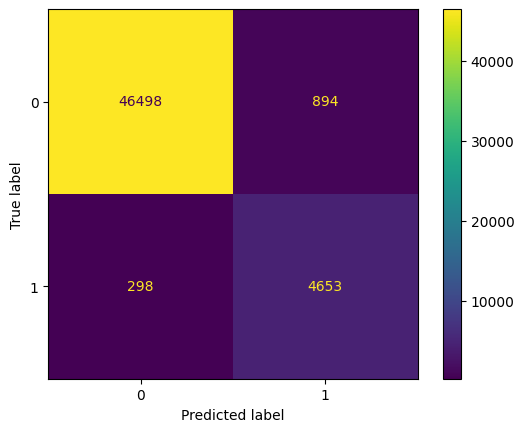

In [9]:
# Make predictions
y_pred = ensemble.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [29]:
from sklearn.metrics import precision_recall_curve

# Get probabilities from the best model
y_pred_proba = xgboost_best_model.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Find the threshold with the best balance between precision and recall
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

# Apply the best threshold
y_pred_opt = (y_pred_proba >= best_threshold).astype(int)

# Evaluate with the optimized threshold
precision_opt = precision_score(y_test, y_pred_opt)
recall_opt = recall_score(y_test, y_pred_opt)
f1_opt = f1_score(y_test, y_pred_opt)
roc_auc_opt = roc_auc_score(y_test, y_pred_proba)

# Print optimized metrics
print(f'Best Threshold: {best_threshold}')
print(f'Precision: {precision_opt}')
print(f'Recall: {recall_opt}')
print(f'F1: {f1_opt}')
print(f'AUC-ROC: {roc_auc_opt}')


Best Threshold: 0.4578624665737152
Precision: 0.839869981425918
Recall: 0.9527919604506038
F1: 0.8927744238144056
AUC-ROC: 0.9947855642588331


In [30]:
from sklearn.metrics import precision_recall_curve

# Get probabilities from the best model
y_pred_proba = lightgbm_best_model.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Find the threshold with the best balance between precision and recall
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

# Apply the best threshold
y_pred_opt = (y_pred_proba >= best_threshold).astype(int)

# Evaluate with the optimized threshold
precision_opt = precision_score(y_test, y_pred_opt)
recall_opt = recall_score(y_test, y_pred_opt)
f1_opt = f1_score(y_test, y_pred_opt)
roc_auc_opt = roc_auc_score(y_test, y_pred_proba)

# Print optimized metrics
print(f'Best Threshold: {best_threshold}')
print(f'Precision: {precision_opt}')
print(f'Recall: {recall_opt}')
print(f'F1: {f1_opt}')
print(f'AUC-ROC: {roc_auc_opt}')


Best Threshold: 0.49368099099124957
Precision: 0.8495335650265228
Recall: 0.9410000810438447
F1: 0.892930613500471
AUC-ROC: 0.9947728804085477


In [31]:
from sklearn.metrics import precision_recall_curve

# Get probabilities from the best model
y_pred_proba = catboost_best_model.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Find the threshold with the best balance between precision and recall
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

# Apply the best threshold
y_pred_opt = (y_pred_proba >= best_threshold).astype(int)

# Evaluate with the optimized threshold
precision_opt = precision_score(y_test, y_pred_opt)
recall_opt = recall_score(y_test, y_pred_opt)
f1_opt = f1_score(y_test, y_pred_opt)
roc_auc_opt = roc_auc_score(y_test, y_pred_proba)

# Print optimized metrics
print(f'Best Threshold: {best_threshold}')
print(f'Precision: {precision_opt}')
print(f'Recall: {recall_opt}')
print(f'F1: {f1_opt}')
print(f'AUC-ROC: {roc_auc_opt}')


Best Threshold: 0.4647267892623982
Precision: 0.8428741478195001
Recall: 0.9468757597860442
F1: 0.891853208908227
AUC-ROC: 0.9946397581476671


In [5]:
X = pd.read_csv('D:/Hackathons/GST_GOV/Test_20/X_Test_Data_Input_Imputed.csv')
y = pd.read_csv('D:/Hackathons/GST_GOV/Test_20/Y_Test_Data_Target.csv')
y=y.drop('ID', axis=1)

In [35]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Splitting data (replace X, y with your actual feature matrix and labels)
X_train_stacking, X_test_stacking, y_train_stacking, y_test_stacking = train_test_split(X, y, test_size=0.2, random_state=42)

# Base models (already hypertuned models)
estimators = [
    ('xgboost', xgboost_best_model),
    ('lightgbm', lightgbm_best_model),
    ('catboost', catboost_best_model)
]

# Meta-learner (Logistic Regression as meta-classifier, but you can choose other models)
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,  # You can tune the cross-validation strategy
    stack_method='auto'  # Use 'predict_proba' for probability stacking or 'predict' for label stacking
)

# Train the Stacking Classifier
stacking_clf.fit(X_train_stacking, y_train_stacking)




d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 19727, number of negative: 189642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2269
[LightGBM] [Info] Number of data points in the train set: 209369, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094221 -> initscore=-2.263150
[LightGBM] [Info] Start training from score -2.263150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

ValueError: Found input variables with inconsistent numbers of samples: [52343, 261712]

In [41]:
# Make predictions
y_pred = stacking_clf.predict(X_test_stacking)
y_pred_proba = stacking_clf.predict_proba(X_test_stacking)[:, 1]

# Evaluate performance
accuracy = accuracy_score(y_test_stacking, y_pred)
precision = precision_score(y_test_stacking, y_pred)
recall = recall_score(y_test_stacking, y_pred)
f1 = f1_score(y_test_stacking, y_pred)
auc_roc = roc_auc_score(y_test_stacking, y_pred_proba)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {auc_roc}")

Accuracy: 0.976940565118545
Precision: 0.8643441027637213
Recall: 0.8969905069682892
F1 Score: 0.88036475369214
AUC-ROC: 0.9943436072736314


d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 19727, number of negative: 189642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2269
[LightGBM] [Info] Number of data points in the train set: 209369, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094221 -> initscore=-2.263150
[LightGBM] [Info] Start training from score -2.263150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 19727, number of negative: 189642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2269
[LightGBM] [Info] Number of data points in the train set: 209369, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094221 -> initscore=-2.263150
[LightGBM] [Info] Start training from score -2.263150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[LightGBM] [Info] Number of positive: 19727, number of negative: 189642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2269
[LightGBM] [Info] Number of data points in the train set: 209369, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094221 -> initscore=-2.263150
[LightGBM] [Info] Start training from score -2.263150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 19727, number of negative: 189642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2269
[LightGBM] [Info] Number of data points in the train set: 209369, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094221 -> initscore=-2.263150
[LightGBM] [Info] Start training from score -2.263150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 19727, number of negative: 189642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2269
[LightGBM] [Info] Number of data points in the train set: 209369, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094221 -> initscore=-2.263150
[LightGBM] [Info] Start training from score -2.263150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 19727, number of negative: 189642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2269
[LightGBM] [Info] Number of data points in the train set: 209369, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094221 -> initscore=-2.263150
[LightGBM] [Info] Start training from score -2.263150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

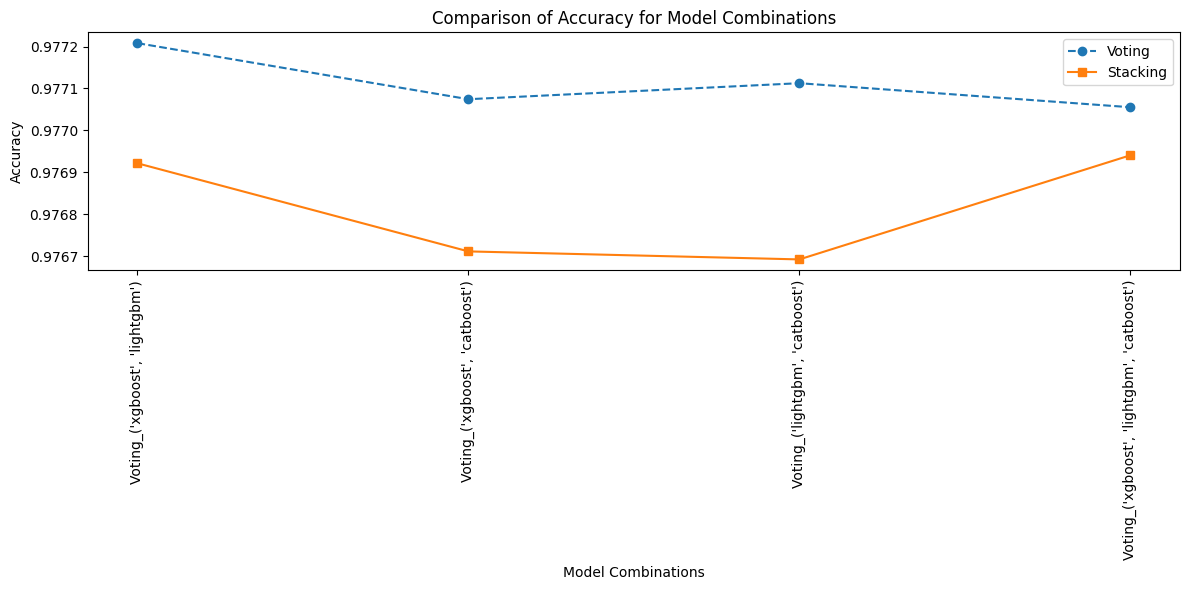

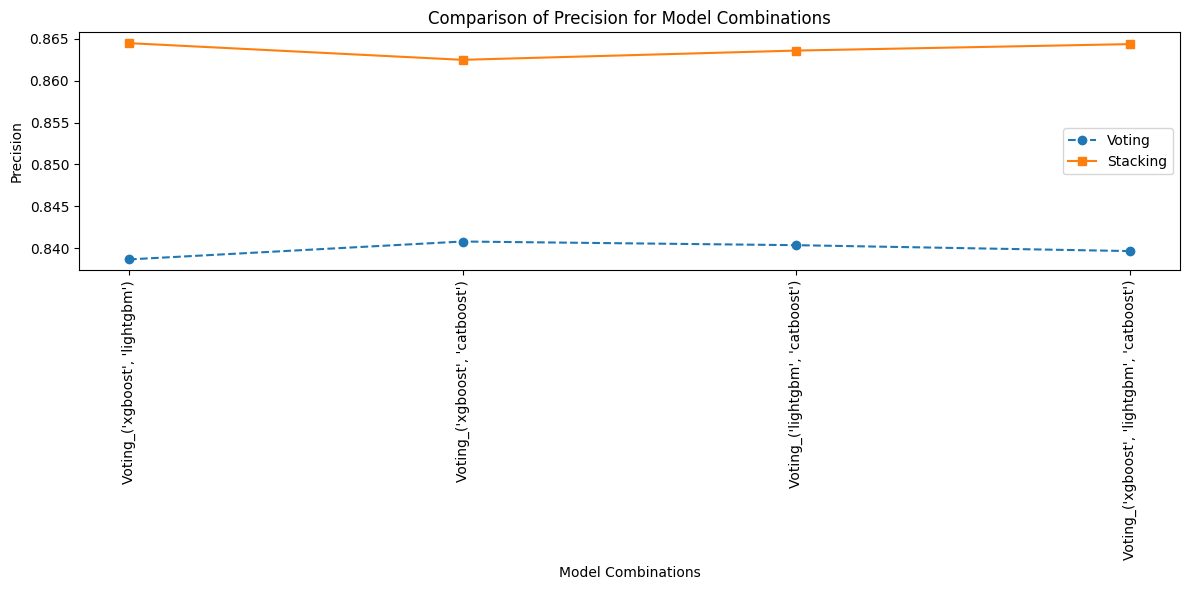

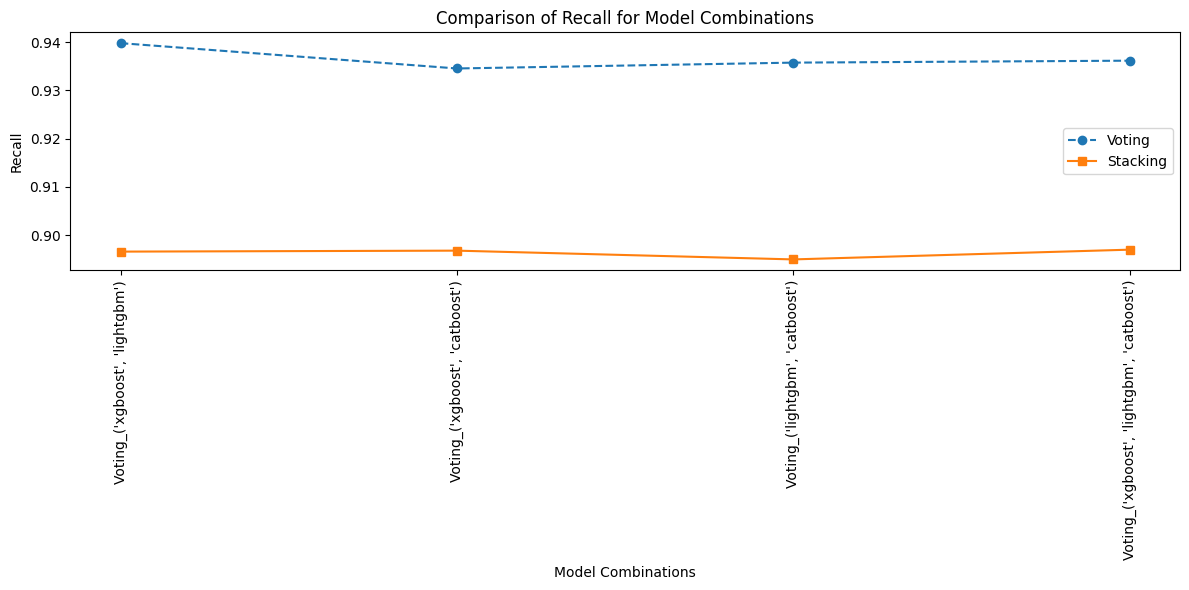

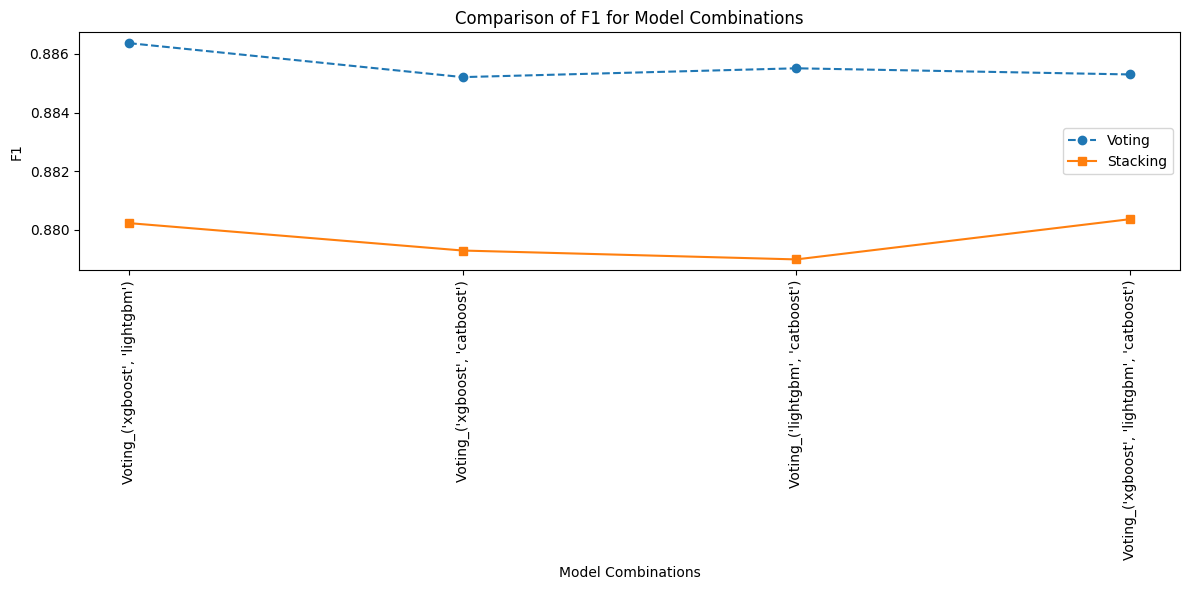

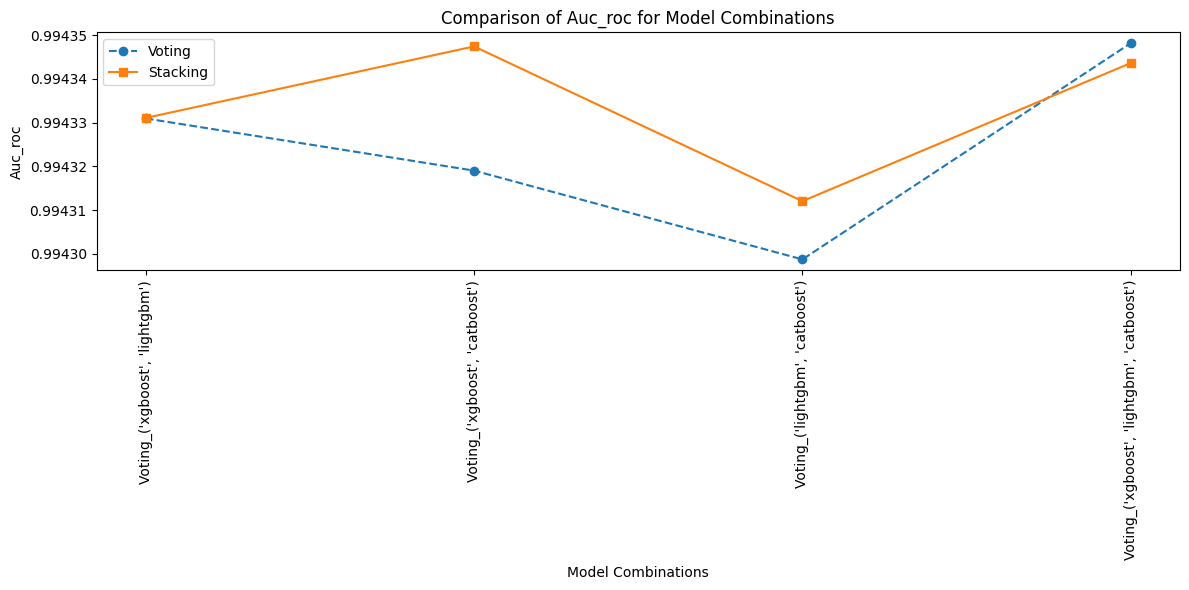

In [6]:
import itertools
import json
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Define the models (replace with your actual hypertuned models)
models = {
    'xgboost': xgboost_best_model,
    'lightgbm': lightgbm_best_model,
    'catboost': catboost_best_model
}

# Metrics storage
results = {}

# Splitting data (replace X, y with your actual feature matrix and labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to evaluate and return metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else np.zeros_like(y_pred)
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auc_roc': roc_auc_score(y_test, y_pred_proba)
    }
    return metrics

# Iterate over different model combinations
for n in range(2, 4):  # From 2 models to 7 models
    for combination in itertools.combinations(models.keys(), n):
        # Voting Classifier
        voting_clf = VotingClassifier(estimators=[(name, models[name]) for name in combination], voting='soft')
        voting_clf.fit(X_train, y_train)
        voting_metrics = evaluate_model(voting_clf, X_test, y_test)

        # Stacking Classifier
        stacking_clf = StackingClassifier(
            estimators=[(name, models[name]) for name in combination],
            final_estimator=LogisticRegression(),
            stack_method='auto'
        )
        stacking_clf.fit(X_train, y_train)
        stacking_metrics = evaluate_model(stacking_clf, X_test, y_test)

        # Store results in JSON-compatible format
        results[f'Voting_{combination}'] = voting_metrics
        results[f'Stacking_{combination}'] = stacking_metrics

# Save the results to a JSON file
with open('model_combinations_results.json', 'a') as f:
    json.dump(results, f, indent=4)

# Load results for plotting (this would be the next step after evaluating)
with open('model_combinations_results.json', 'r') as f:
    results = json.load(f)

# Plot comparison of metrics for all combinations
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'auc_roc']
for metric in metrics_to_plot:
    plt.figure(figsize=(12, 6))
    voting_values = [results[combo][metric] for combo in results if 'Voting' in combo]
    stacking_values = [results[combo][metric] for combo in results if 'Stacking' in combo]
    labels = [combo for combo in results if 'Voting' in combo]

    # Plot for Voting
    plt.plot(labels, voting_values, label='Voting', marker='o', linestyle='--')

    # Plot for Stacking
    plt.plot(labels, stacking_values, label='Stacking', marker='s', linestyle='-')

    plt.title(f'Comparison of {metric.capitalize()} for Model Combinations')
    plt.xlabel('Model Combinations')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()
